In [1]:
from Plate_sim import *

30
current time step  0
current time step  1
current time step  2
current time step  3
current time step  4
current time step  5
current time step  6
current time step  7
current time step  8
current time step  9


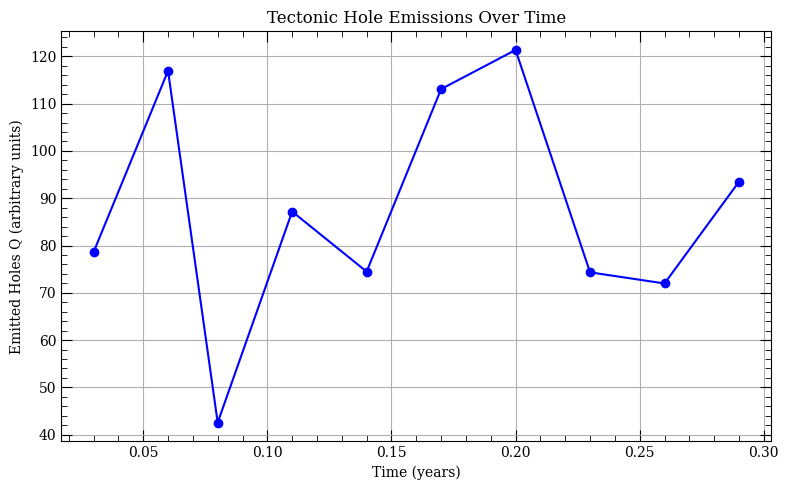

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- Your needed imports here ---
# Assume you have available:
# - run_full_surface_hole_simulation_with_ionization()
# - rydberg_sensor_measurement_from_burst_dict()
# - simulate_tectonic_emissions_and_seismic()
# - simulate_ionization_bursts()
# - update_surface_hole_accumulation()

# 1. Create 5x5 ground map
nx, ny = 5, 5
x_coords = np.linspace(0, 4, nx)
y_coords = np.linspace(0, 4, ny)

terrain_map = np.zeros((nx, ny))  # start flat

# Set 2 mountains
terrain_map[1, 1] = 50.0  # Mountain 1
terrain_map[3, 3] = 60.0  # Mountain 2

# 2. Define source at center
source_positions = [(2, 2, 50)]  # (x_idx, y_idx, depth in meters)

# 3. Define sensors (optional but needed by API)
sensor_positions = [(1, 1), (3, 3)]  # Place sensors on mountains

# 4. Simulation parameters
total_time_yr = 0.3    # 10 time steps
dt_yr = 0.01           # 10 steps exactly

# 5. Run the simulation
tectonic_emissions_df, burst_map_times, measurement_map_times, ground_accumulation_times = \
    run_full_surface_hole_simulation_with_ionization(
        terrain_3d_map=terrain_map,
        x_coords=x_coords,
        y_coords=y_coords,
        source_positions=source_positions,
        sensor_positions=sensor_positions,
        total_time_yr=total_time_yr,
        dt_yr=dt_yr,
        hole_burst_threshold=2e3
    )

# --- Plot tectonic emission events ---
plt.figure(figsize=(8,5))
plt.plot(tectonic_emissions_df["time_years"], tectonic_emissions_df["emission_Q"], marker="o", linestyle="-", color="blue")
plt.title("Tectonic Hole Emissions Over Time")
plt.xlabel("Time (years)")
plt.ylabel("Emitted Holes Q (arbitrary units)")
plt.grid(True)
plt.tight_layout()
plt.show()


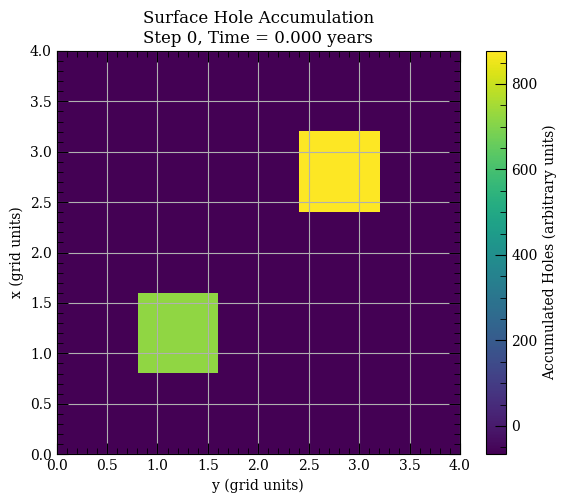

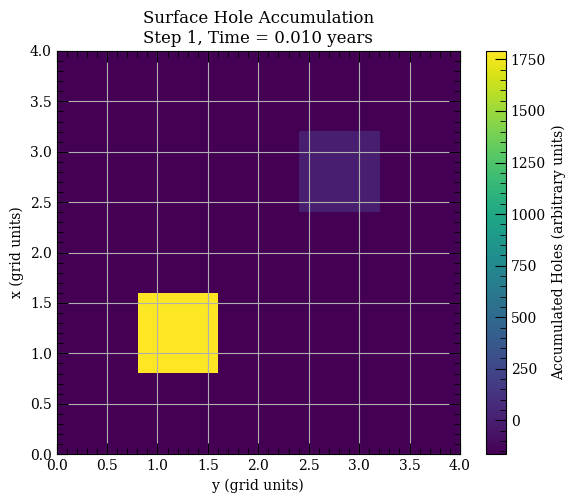

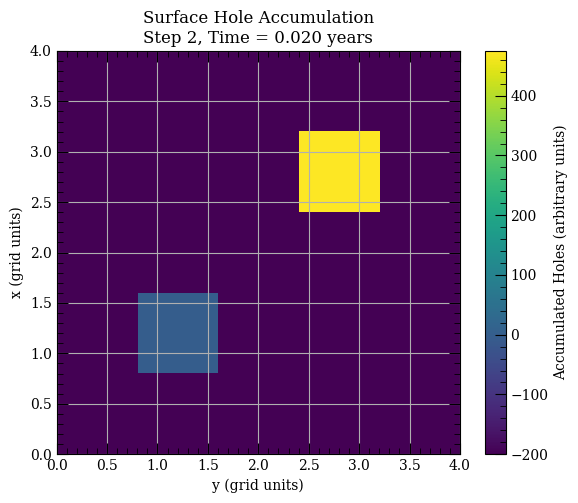

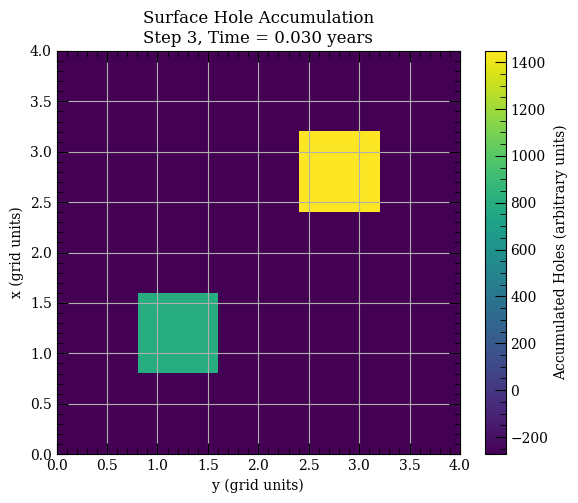

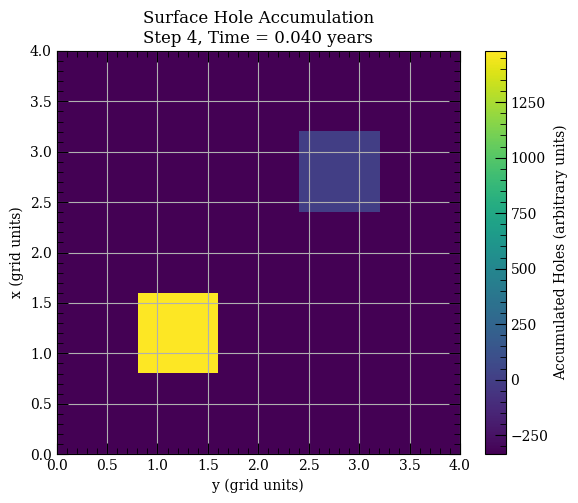

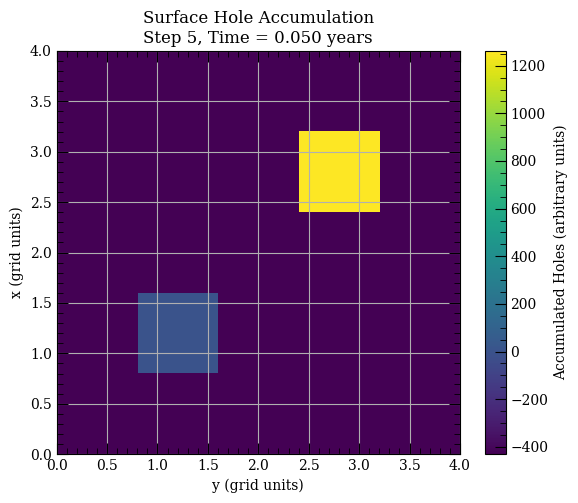

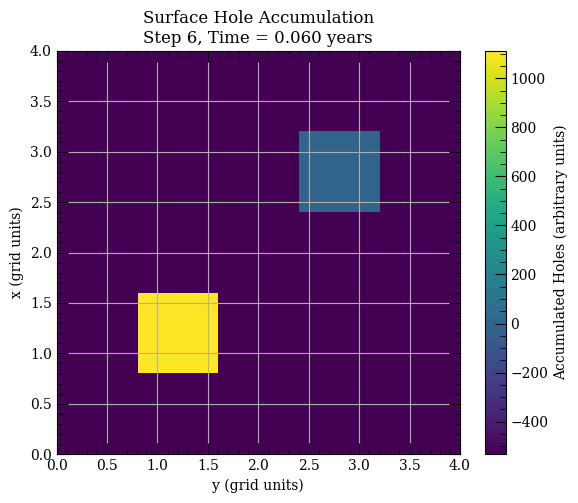

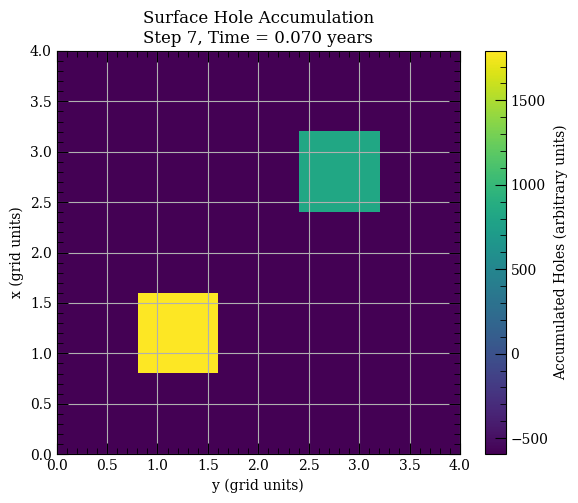

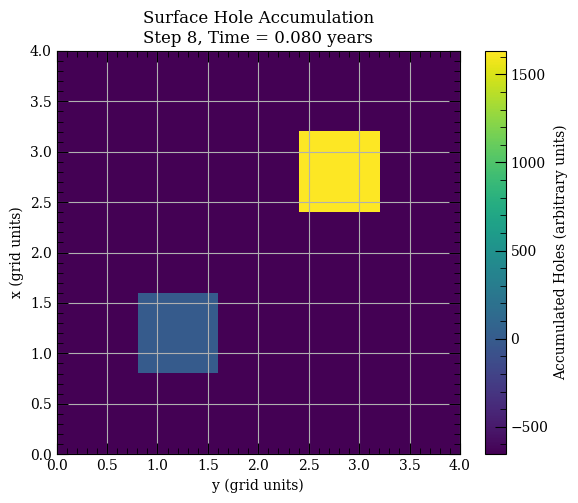

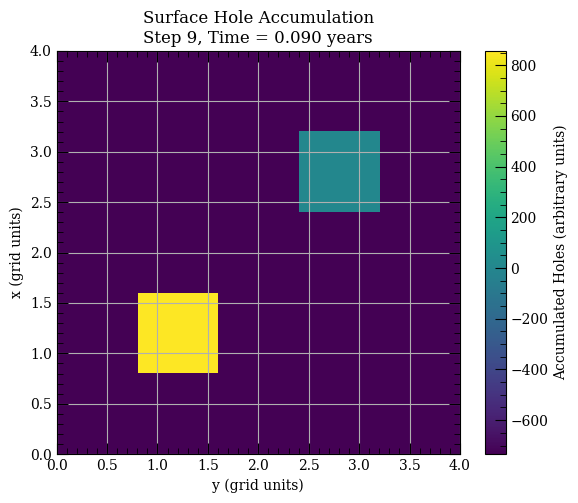

In [3]:
# 6. Plot surface accumulation map at each time step
nt = ground_accumulation_times.shape[0]

for t_idx in range(nt):
    plt.figure(figsize=(6,5))
    plt.imshow(ground_accumulation_times[t_idx], cmap="viridis", origin="lower", extent=[y_coords.min(), y_coords.max(), x_coords.min(), x_coords.max()])
    plt.colorbar(label="Accumulated Holes (arbitrary units)")
    plt.title(f"Surface Hole Accumulation\nStep {t_idx}, Time = {t_idx * dt_yr:.3f} years")
    plt.xlabel("y (grid units)")
    plt.ylabel("x (grid units)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

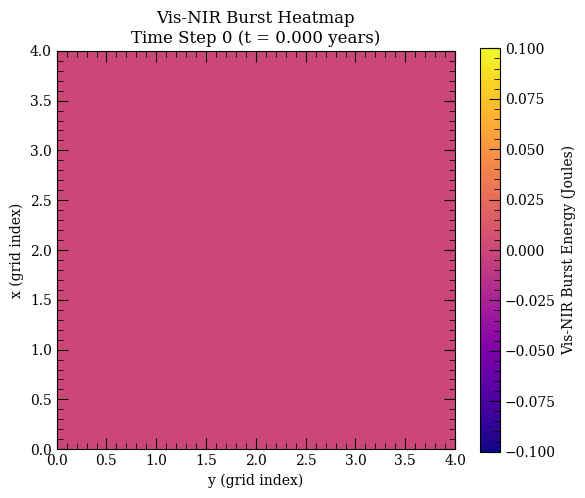

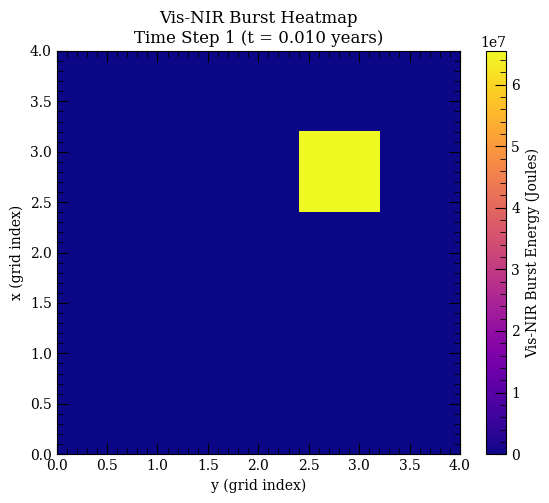

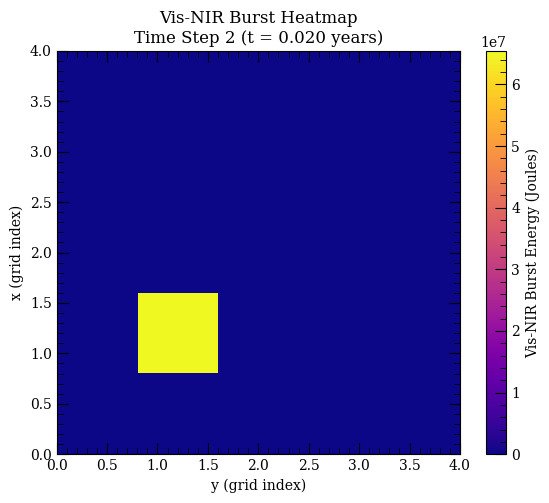

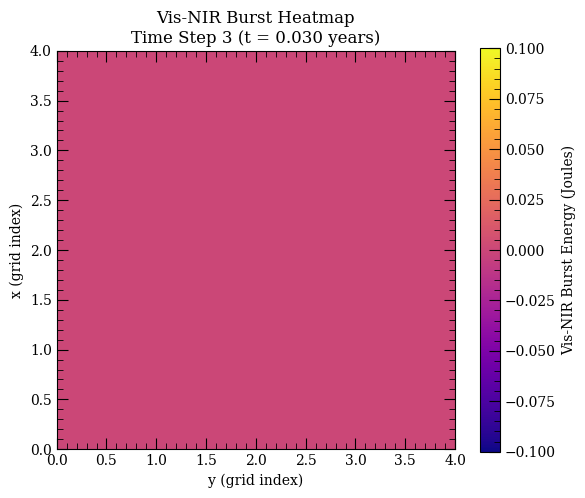

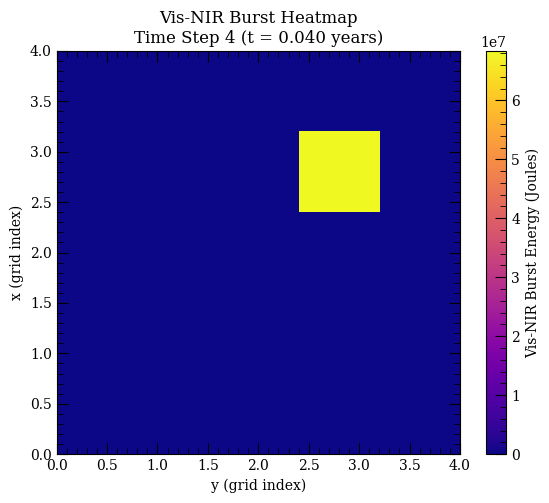

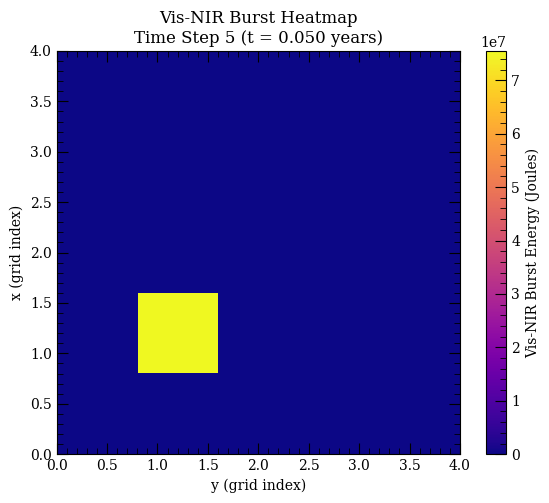

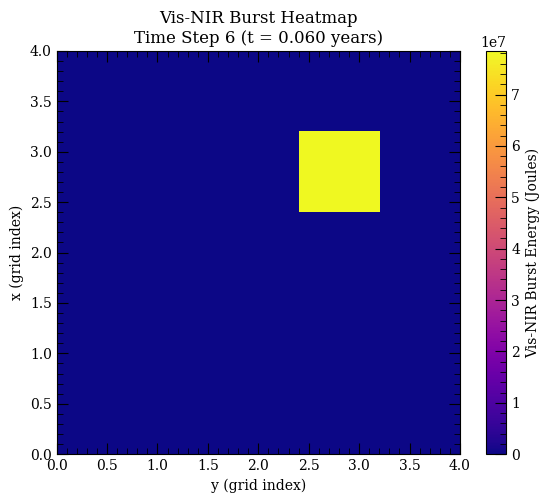

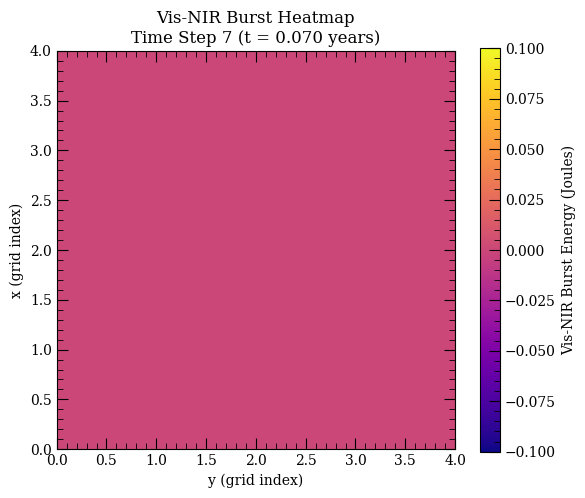

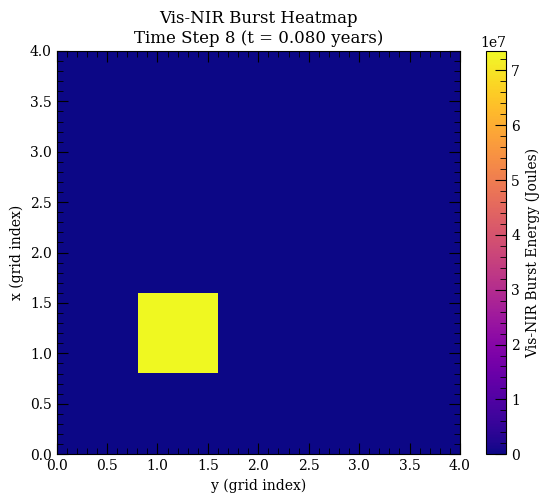

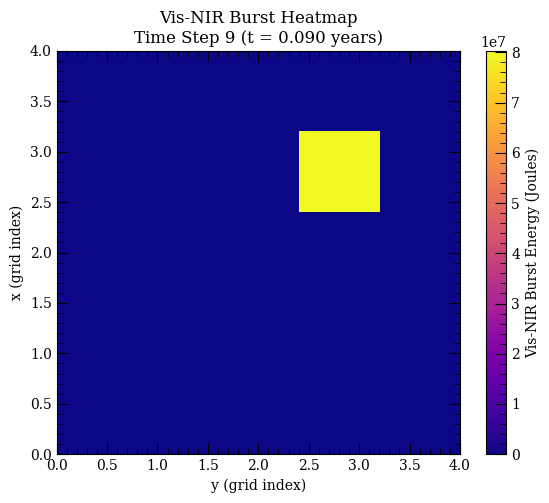

In [4]:
nt = burst_map_times.shape[0]
nx, ny = burst_map_times.shape[1], burst_map_times.shape[2]

# Loop through each time step and plot
for t_idx in range(nt):
    visnir_energy_map = np.zeros((nx, ny))

    # Build Vis-NIR burst map for this timestep
    for ix in range(nx):
        for iy in range(ny):
            burst_info = burst_map_times[t_idx, ix, iy]
            E_visnir = burst_info.get("E_visnir_J", 0.0)
            visnir_energy_map[ix, iy] = E_visnir

    # --- Plot the heatmap for this time step ---
    plt.figure(figsize=(6,5))
    plt.imshow(visnir_energy_map, origin="lower", cmap="plasma", extent=[0, ny-1, 0, nx-1])
    plt.colorbar(label="Vis-NIR Burst Energy (Joules)")
    plt.title(f"Vis-NIR Burst Heatmap\nTime Step {t_idx} (t = {t_idx * 0.01:.3f} years)")
    plt.xlabel("y (grid index)")
    plt.ylabel("x (grid index)")
    plt.grid(False)
    plt.tight_layout()
    plt.show()

[[ 0.96383958+0.j  0.01775148+0.j -0.        +0.j]
 [-0.        +0.j  0.00328731+0.j -0.        +0.j]
 [-0.17094017+0.j  0.00295858+0.j  0.03287311+0.j]]
[[ 0.96383958+0.j  0.01775148+0.j -0.        +0.j]
 [-0.        +0.j  0.00328731+0.j -0.        +0.j]
 [-0.17094017+0.j  0.00295858+0.j  0.03287311+0.j]]
[[ 9.92874223e-01+0.j  6.11043045e-10+0.j  5.55663728e-02+0.j]
 [-2.07923946e-01+0.j  2.17811932e-13+0.j  7.62667376e-11+0.j]
 [-2.78427057e-02+0.j  4.44232038e-01+0.j  7.12577742e-03+0.j]]
[[ 0.96383958+0.j  0.01775148+0.j -0.        +0.j]
 [-0.        +0.j  0.00328731+0.j -0.        +0.j]
 [-0.17094017+0.j  0.00295858+0.j  0.03287311+0.j]]
[[ 0.96383958+0.j  0.01775148+0.j -0.        +0.j]
 [-0.        +0.j  0.00328731+0.j -0.        +0.j]
 [-0.17094017+0.j  0.00295858+0.j  0.03287311+0.j]]
[[ 9.92874223e-01+0.j  5.29559054e-10+0.j  5.55663728e-02+0.j]
 [-2.07923946e-01+0.j  1.88766212e-13+0.j  6.60963933e-11+0.j]
 [-2.78427057e-02+0.j  4.44232038e-01+0.j  7.12577742e-03+0.j]]
[[ 0

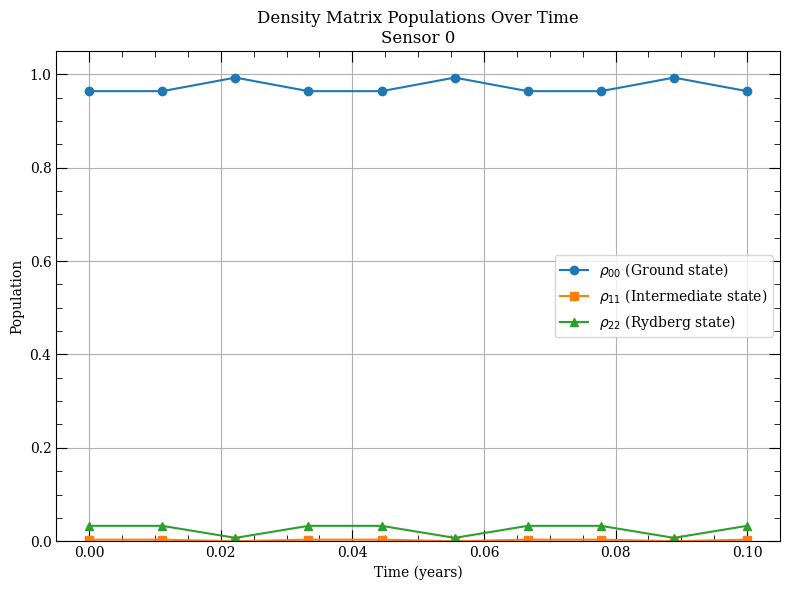

In [5]:
# --- Choose the sensor to plot ---
sensor_idx = 0  # first sensor

nt = measurement_map_times.shape[0]

# Initialize arrays
rho_00 = np.zeros(nt)
rho_11 = np.zeros(nt)
rho_22 = np.zeros(nt)

for t_idx in range(nt):
    rho = measurement_map_times[t_idx, sensor_idx]
    print(rho)

    if rho is not None:
        rho_matrix = rho  # reshape it to a 3x3 matrix
        rho_00[t_idx] = np.real(rho_matrix[0,0])
        rho_11[t_idx] = np.real(rho_matrix[1,1])
        rho_22[t_idx] = np.real(rho_matrix[2,2])
    else:
        rho_00[t_idx] = np.nan
        rho_11[t_idx] = np.nan
        rho_22[t_idx] = np.nan

# Time axis
times = np.linspace(0, nt*0.01, nt)  # assuming dt_yr = 0.01

# --- Plot ---
plt.figure(figsize=(8,6))
plt.plot(times, rho_00, label=r"$\rho_{00}$ (Ground state)", marker='o')
plt.plot(times, rho_11, label=r"$\rho_{11}$ (Intermediate state)", marker='s')
plt.plot(times, rho_22, label=r"$\rho_{22}$ (Rydberg state)", marker='^')
plt.title(f"Density Matrix Populations Over Time\nSensor {sensor_idx}")
plt.xlabel("Time (years)")
plt.ylabel("Population")
plt.ylim(0,1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()